# Financial Engineering - Lab 5 - Part 2

In [2]:
import numpy_financial as npf
import numpy as np

## What Is Net Present Value (NPV)?

Net present value (NPV) is the difference between the present value of cash inflows and the present value of cash outflows over a period of time. NPV is used in capital budgeting and investment planning to analyze the profitability of a projected investment or project. NPV is the result of calculations used to find today’s value of a future stream of payments.

Net Present Value (NPV) Formula
$$
N P V=\sum_{t=1}^{n} \frac{R_{t}}{(1+i)^{t}}
$$
where:

$R_{t}=$ Net cash inflow-outflows during a single period $t$ \
$i=$ Discount rate or return that could be earned in alternative investments \
$t=$ Number of timer periods

In [3]:
rate = 0.05
cashflows = [-100000, 10000, 18000, 25000, 32000, 35000]
npf.npv(rate, cashflows)

1196.175119077605

## What Is Internal Rate of Return (IRR)?

The internal rate of return (IRR) is a metric used in financial analysis to estimate the profitability of potential investments. IRR is a discount rate that makes the net present value (NPV) of all cash flows equal to zero in a discounted cash flow analysis.

IRR calculations rely on the same formula as NPV does. Keep in mind that IRR is not the actual dollar value of the project. It is the annual return that makes the NPV equal to zero.

Generally speaking, the higher an internal rate of return, the more desirable an investment is to undertake. IRR is uniform for investments of varying types and, as such, can be used to rank multiple prospective investments or projects on a relatively even basis. In general, when comparing investment options with other similar characteristics, the investment with the highest IRR probably would be considered the best.

## Formula and Calculation for IRR
The formula and calculation used to determine this figure are as follows:
$$
0=\mathrm{NPV}=\sum_{t=1}^{T} \frac{C_{t}}{(1+I R R)^{t}}-C_{0}
$$
where: 

$C_{t}:$ Net cash inflow during the period t \
$C_{0}:$ Total initial investment costs \
$IRR:$ The internal rate of return \
$t:$ The number of time periods 

In [4]:
cashflows = [-100000, 10000, 18000, 25000, 32000, 35000]
npf.irr(cashflows)

0.053625505794066664

In [5]:
rate = 0.05
cashflows = [-100000, 15000, 25000, 35000,45000, 55000]
print(npf.npv(rate, cashflows))
print(npf.irr(cashflows))

47311.317717167105
0.17718948308565352


## Bond valuation

Một trái phiếu có face value là \$ 2000, coupon rate là 8\% trả hàng năm (vào cuối năm), thời hạn là 5 năm. Sử dụng interest rate 6\%, tính giá hiện tại của trái phiếu.

In [6]:
import numpy_financial as npf
import numpy as np

principal = 2000
annual_interest = 0.06
period = 5
coupon_payment = 0.08 * principal

bond_price = (npf.pv(annual_interest, period, coupon_payment, principal)) * -1
print("The price of bond is : $" + str(bond_price))

The price of bond is : $2168.494551422629


## Yield to Maturity

Một bond có mệnh giá là \$ 10,000, trả coupon 5\% / năm. Thời hạn của trái phiếu là 4 năm. Giá thị trường của trái phiếu là \& 9,000. Tính YTM (Yield to Maturity) của trái phiếu và so sánh với kết quả theo phương pháp dưới đây

In [7]:
face_value = 10000
market_price = 9000
n = 4
coupon_payment = 0.05 * 10000

ytm = ((coupon_payment + (face_value-market_price)/ n)) / ((face_value + market_price)/2)
print("The YTM for this bond is: " + str(ytm*100) + "%")

The YTM for this bond is: 7.894736842105263%


# Exercises

## Problem 1
Consider a 30 -year fixed mortgage where you will borrow $\$ 238,000$ at rate $5.25 \%$. Compute the monthly payment, the balance (the amount of principal you owe) after 12 payments, and the amount of interest payment for the $12^{\text {th }}$ payment.

In [8]:
principal = 238000
annual_interest_rate = 0.0525
monthly_interest_rate = annual_interest_rate / 12
total_number_of_payments = 30 * 12

monthly_payment = principal * (monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -total_number_of_payments))
print("Monthly Payment:", monthly_payment)

Monthly Payment: 1314.2448110977157


In [9]:
number_of_payments = 12

balance = principal * (1 + monthly_interest_rate) ** number_of_payments - ((1 + monthly_interest_rate) ** number_of_payments - 1) / monthly_interest_rate * monthly_payment
print("Balance after 12 payments:", balance)

Balance after 12 payments: 234644.0740553961


In [10]:
interest_payment = balance * monthly_interest_rate
print("Interest Payment for the 12th payment:", interest_payment)

Interest Payment for the 12th payment: 1026.567823992358


## Problem 2
Calculate 6-, 12-, 18- and 24-month zero rates using the following bonds. Compute the yields of the bonds. 
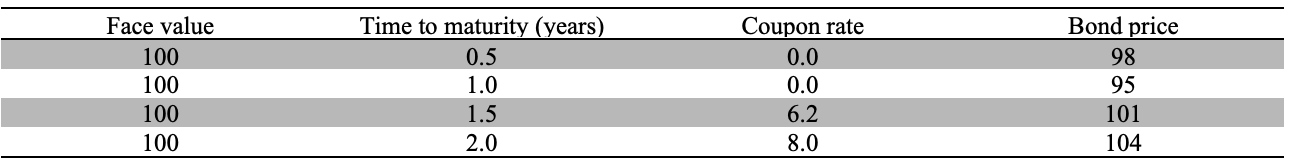

In [ ]:
face_value = [100, 100, 100, 100]
time_to_maturity = [0.5, 1.0, 1.5, 2.0]
coupon_rate = [0.0, 0.0, 6.2, 8.0]
bond_price = [98, 95, 101, 104]

In [12]:

import math

face_value = [100, 100, 100, 100]
time_to_maturity = [0.5, 1.0, 1.5, 2.0]
coupon_rate = [0.0, 0.0, 6.2, 8.0]
bond_price = [98, 95, 101, 104]

zero_rates = []
for i in range(len(face_value)):
    bond_price_i = bond_price[i]
    cash_flows = [coupon_rate[i] / 2 * face_value[i]]
    for j in range(1, int(2 * time_to_maturity[i])):
        if j % 2 == 0:
            cash_flows.append(coupon_rate[i] / 2 * face_value[i])
        else:
            cash_flows.append(0)
    cash_flows[-1] += face_value[i]
    zero_rate = math.pow(bond_price_i / sum(cash_flows), 1 / (2 * time_to_maturity[i])) - 1
    zero_rates.append(zero_rate)
print("Zero Rates:", zero_rates)

yields = []
for i in range(len(face_value)):
    bond_price_i = bond_price[i]
    cash_flows = [coupon_rate[i] / 2 * face_value[i]]
    for j in range(1, int(2 * time_to_maturity[i])):
        if j % 2 == 0:
            cash_flows.append(coupon_rate[i] / 2 * face_value[i])
        else:
            cash_flows.append(0)
    cash_flows[-1] += face_value[i]
    yield_i = math.pow(sum(cash_flows) / bond_price_i, 1 / (2 * time_to_maturity[i])) - 1
    yields.append(yield_i)
print("Yields:", yields)



Zero Rates: [-0.020000000000000018, -0.025320565519103666, -0.4804073977716943, -0.41696086388689224]
Yields: [0.020408163265306145, 0.025978352085153977, 0.9245847529611408, 0.7151507301321247]


## Problem 3
The 6-month zero rate is $5.0 \%$, and the 12 -month zero rates is $5.1 \%$. An 18 -month bond with coupon rate $4.5 \%$ has a yield of $5.2 \%$. What is the 18 -month zero rate?

In [13]:
from math import exp

coupon_rate = 0.045
yield_rate = 0.052 
bond_price = 0
time = 0.5
maturity = 19
for i in range(1, maturity + 1):
    bond_price += (coupon_rate + 1) * exp(-yield_rate * time)
    time += 0.5
zero_rate_18_months = (100 + coupon_rate) / bond_price
print("the 18-month zero rate is: {:.2%}".format(zero_rate_18_months))


the 18-month zero rate is: 646.92%
